# Systems of Linear equation

The goal of this chapter is to numerically solve systems of linear equations, given in matrix form by



$Ax = \begin{pmatrix}a_{11} & ... & a_{1n} \\ a_{n1} & ... & a_{nn} \end{pmatrix}\begin{pmatrix} x_1 \\ ... \\ x_n \end{pmatrix} = \begin{pmatrix} b_1 \\ ... \\ b_n \end{pmatrix} = b$

## Theorem 4.3

Let A be a $n \times n$ matrix with $det(A) \neq 0. Then there exists a permutation matrix $P$, a lower triangular matrix $L$ and a upper triangular matrix $U$

$L = \begin{pmatrix} 1 & 0 & ... & 0 \\ * & 1 & ... & 0 \\ * & * & ... & 0 \end{pmatrix}$

$U = \begin{pmatrix} d_1 & * & ... & * \\ 0 & d_2 & ...& * \\ 0 & 0 & ... & * \end{pmatrix}$

Mit $PA=LU$ diese Zerlegung heißt 

In [32]:
# Implementation of the LU Decomposiiton

import numpy as np
from scipy.linalg import lu

def lu_decomposition(A):
    """
    Performs the LU decomposition with column pivoting.

    Args:
        A (numpy.ndarray): A square matrix
    Returns:
        P (numpy.ndarray): Permutation matrix for column pivoting
        L (numpy.ndarray): Lower triangular matrix
        U (numpy.ndarray): Upper triangular matrix
    """

    n = A.shape[0]
    #Remember np.eye makes identiy matrix
    P = np.eye(n)
    # Zeros_Like makes same array as A
    L = np.zeros_like(A)
    U = A.copy()

    for i in range(n):
        pivot = np.argmax(np.abs(U[i:,i])) + i
        
        # If now Pivot not equal to i swap rows in U and Permutation matrix
        if pivot != i:
            U[[i,pivot],:] = U[[pivot,i],:] # Swap rows of U
            P[[i,pivot],:] = P[[pivot,i],:] # Swap rows of P
            if i > 0:
                L[[i,pivot], :i] = L[[pivot,i], :i]
        for j in range(i+1,n):
            # If i = 0, n = 3 --> j = 1,2 (stop not included)
            L[j,i] = U[j,i] / U[i,i] # Multiplier
            U[j,i:] = U[j,i:] - L[j,i]*U[i,i:] # Gaussian
    
    np.fill_diagonal(L,1)

    return P,L,U

A = np.array([[0,1,3],[6,-2,4],[-3,-3,-2]],dtype=float)

P,L,U  = lu_decomposition(A)

# Use for Comparison
P_np,L_np,U_np = lu(A)





## Cholesky Zerlegung

Man benötigt eine reelle, symmetrische positiv definity Matrix A (spd-Matrix)

+ reell: Die Koeffizienten von $A$ sind reelle Zahlen
+ symmetrisch: $A = A^T$
+ positiv definit: Für alle $x \neq 0$ gilt $x^T A x >0$


### Theorem 4.5 (Existenz der Cholesky Zerlegung)

Es sei $A$ eine $n \times n$ spd-Matrix. Dann hat $A$ eine Zerlegung

$A = CC^T = \begin{pmatrix}c_{11} & 0 & 0 & ... & 0 \\ c_{21} & c_{22} & 0 & ... & 0 \\ c_{31} & c_{32} & c_{33} & ... & 0 \\ ... & ... & ...& c_{nn} \end{pmatrix} * C^T$

Man nennt dann $C$ den eindeutigen Cholesky Faktor

Für die Implementierung kann man folgende Berechnungmethode verwenden:

+ Diagonale $l_{kk} = \sqrt{a_kk - \sum_{j=1}^{k-1}l_{kj^2}}$
+ Off-Diagonals $l_{ik} = \frac{1}{l_{kk}}(a_{ik}-\sum_{j=1}^{k-1}l_{ij}l_{kj})$ for $i > k$

In [33]:
import numpy as np

def cholesky(A):
    """ 
    Performs the Cholesky decomposition of the matrix A, which must be symmetric and positive definite
    """

    n = len(A)
    C = np.zeros((n,n))
    for i in range(n):
        for k in range(i +1):
            #print(i,k)
            # Calculate the dot product
            tmp_sum = np.dot(C[i, :k], C[k,:k])
            if i == k: # Diagonal Elements
                value = A[i,i] - tmp_sum
                if value <= 0:
                    raise np.linalg.LinAlgError("Matrix not positive definite")
                C[i,k] = np.sqrt(value)
            else:
                C[i,k] = (A[i,k]-tmp_sum)/C[k,k]

    return C 

A = np.array([[6, 3, 4, 8], 
              [3, 6, 5, 1], 
              [4, 5, 10, 7], 
              [8, 1, 7, 25]])

C = cholesky(A)

print(C)

# Calculate the Original Matrix

print(C@C.T)

[[ 2.44948974  0.          0.          0.        ]
 [ 1.22474487  2.12132034  0.          0.        ]
 [ 1.63299316  1.41421356  2.30940108  0.        ]
 [ 3.26598632 -1.41421356  1.58771324  3.13249102]]
[[ 6.  3.  4.  8.]
 [ 3.  6.  5.  1.]
 [ 4.  5. 10.  7.]
 [ 8.  1.  7. 25.]]


## Konditions and Stability and Matrix Norm

### Theorem 4.7 (Matrixnormen, siehe Minkowski Ungleichung)

Sei $A$ eine $m \times n$ Matrix. Dann ist:

+ $||A||_1 = \max_{1 \leq j \leq n}(\sum_{i = 1}^m |a_{ij}|)$ (maximale Spaltenbetragssumme)
+ $||A||_\infty = \max_{1 \leq i \leq m}(\sum_{j = 1}^n |a_{ij}|)$ (maximale Zeilenbetragssumme)
+ $||A||_2 = \sqrt{größter ~ Eigenwert ~ von ~ A^T A}$



In [34]:
import numpy as np

A = np.array([[1,-3,7],[-4,6,1]])

def norm_1(A):
    return np.max(np.sum(np.abs(A), axis=0))

def norm_inf(A):
    return np.max(np.sum(np.abs(A),axis = 1))

def norm_2(A):
    eigenvalues = np.linalg.eigvals(A.T @ A)
    return np.sqrt(np.max(eigenvalues))

print(norm_1(A))
print(norm_inf(A))
print(norm_2(A))



9
11
8.443758555334131


# Kondition einer Matrix

Die Kondition einer Matrix ist gegeben durch $\kappa(A):=||A||\cdot ||A^{-1}||$ und hängt von der jeweiligen Norm ab

### Matrizen mit großen Konditionen

Betrachte die Hilbert matrix $H_n = [\frac{1}{i+j-1}]^n_{i,j=1}$ und die Vandermonde Matrix

In [35]:
import numpy as np
from scipy.linalg import hilbert
def hilbert_matrix(n):
    H = np.zeros((n,n))
    for i in range(1,n+1):
        for j in range(1,n+1):
            H[i-1,j-1] = 1/(i + j - 1)
    return H

print(hilbert_matrix(4))
#print(hilbert(3))

# Calculate the Inverse
H_3 = hilbert_matrix(3) 
H_inv = np.linalg.inv(H_3)

print("Condition of Hilber (n=3): ", (norm_1(H_3)*norm_1(H_inv))) #nice



[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]
Condition of Hilber (n=3):  748.0000000000027


# Aufgaben

hier noch die Fehlenden Aufgaben aus dem Skript

## Aufgabe 21

Sei $v=[1,...1]^T \in \mathbb{R}^{15}$ und H die Hilbert Matrix für $n=15$. Berechnen sie $b = Hv$ und anschließend $Hx=b$. Vergleichen sie die exakte Lösung von v mit der numerischen Lösung und berehcnen sie die Defekte von x



Als Information zum Defekt

Sei $\hat{x}$ die Numerische Lösung von $Ax = b$. Man nennt $d = b - A \hat{x}$ den Defekt oder Residuum

In [36]:
import numpy as np

v = np.ones(15)

H = hilbert_matrix(15)


# Calculation of B
b = H @ v

# Numerical Solution

x = np.linalg.solve(H,b)

# now we calculate d = b - A(hatx)

d = b - H@x
print(b)
print(H@x)
print(d)

[3.31822899 2.38072899 1.93955252 1.66177474 1.46440632 1.31440632
 1.1953587  1.09795611 1.01643437 0.94698992 0.88698992 0.83454237
 0.78824608 0.74703728 0.71009147]
[3.31822899 2.38072899 1.93955252 1.66177474 1.46440632 1.31440632
 1.1953587  1.09795611 1.01643437 0.94698992 0.88698992 0.83454237
 0.78824608 0.74703728 0.71009147]
[ 0.00000000e+00 -4.44089210e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.22044605e-16 -2.22044605e-16  0.00000000e+00
  0.00000000e+00  1.11022302e-16  0.00000000e+00 -2.22044605e-16
 -2.22044605e-16 -2.22044605e-16  0.00000000e+00]


Man sieht hier die Lösungen die Defekte sind in der Größenordnung der Maschinengenauigkeit eps

## Aufgabe 22

Sei $v = [1,...1]^T \in \mathbb{R}^{50}$ und $W$ die Wilkinson Matrix der Dimension 50

+ Berechnen Sie $b=Wv$
+ Lösen sie $Wx =b$ und bestimmen sie Fehler und Defekte
+ Verbessen sie die numerische Lösung durch eine Nachiteration

### Defekt und Nachiteration

Sei $\hat{x}$ numerische Lösung von $Ax = b$ dann ist $d = b - A \hat{x}$ der Defekt es gilt $d = Ax - A\hat{x} = A \Delta x$

Man kann nun mit $\tilde{x}:= \hat{x} + \hat{\Delta x}$ die Lösung verbessern durch Lösen von $A \Delta x = d$

In [37]:
def wilkinson(n):
    W = np.diag(np.ones(n))
    lower_diag_indices = np.tril_indices(W.shape[0],k=-1)
    W[lower_diag_indices] = -1
    W[:,-1] = 1
    return W

W = wilkinson(50)
v = np.ones(50)

b = W@v
x = np.linalg.solve(W,b)
d = b- W@x

x_delta_hat = np.linalg.solve(W,d)
x_nachiteration = x + x_delta_hat
print(x_nachiteration)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


# Numerical Stability of the LU-Decomposition

We make the analysis regarding the backwards stability, so a numerical result $\tilde{x}$ can be considered a exact result of perturbed data $\tilde{x} = P(\tilde{y})$, and $\frac{|\tilde{y_i} - y_i|}{|y_i|} \leq C \cdot eps$



### Theorem of Wilkinson

Let $\tilde{L},\tilde{U}$ be the numerical result of a LU decomposition of $A$ with pivoting $|\tilde{l_{ij}}|\leq 1 ~ \forall i ,j$, then

$|a_{ij} - \tilde{a}_{ij}| \leq 2 a \min(i-1,j)\frac{eps}{1-eps}$ where $a = \max_{i,j,k}|\tilde{a}_{ij}^{(k)}|$

So $\tilde{a}_{ij}^{(k)}$ are the entries of the Matrix $\tilde{A}^{(k)}$ which are intermediate results of the LU Decomposition

### Some Conclusions:

The LU-Decomposition is numerical stable in regards to the backwards analysis if $\beta := \frac{\max_{i,j,k}|\tilde{a}_{ij}^{(k)}|}{\max{i,j}|a_{ij}|}$ is not to big, then one has $|a_{ij} - \tilde{a}_{ij}| \leq 2 \beta \max_{ij}|a_{ij}| n \frac{eps}{1-eps}$


If one now uses Pivoting when decomposing $A$ one can proof the upper bound $\beta \leq 2^{n-1}$. For this one uses the following special Wilkinson Matrix

$W_n = \begin{pmatrix} 1 & 0 & ... & ...& 0 & 1 \\ -1 & 1 & 0 & ... & 0 & 1 \\ -1 & -1 & 1 & ... & 0 & 1 \\ ... & ... & ... & ... & ... & ... & \\ -1 & -1 & -1 & ... & -1 & 1 \end{pmatrix}$



In [38]:
import numpy as np


# First of we have to adapt our Algorithm of the LU Decomposition fo find the maximum values in each step


def lu_decomposition_with_beta(A):
    """
    Performs the LU decomposition with column pivoting and calculates beta values.

    Args:
        A (numpy.ndarray): A square matrix
    Returns:
        P (numpy.ndarray): Permutation matrix for column pivoting
        L (numpy.ndarray): Lower triangular matrix
        U (numpy.ndarray): Upper triangular matrix
        max_a_ij_k: Calculates the maximum entry in each step 
    """

    n = A.shape[0]
    P = np.eye(n)
    L = np.zeros_like(A)
    U = A.copy()
    max_a_ij_k = []

    for i in range(n):
        pivot = np.argmax(np.abs(U[i:, i])) + i
        
        # If pivot not equal to i, swap rows in U and permutation matrix
        if pivot != i:
            U[[i, pivot], :] = U[[pivot, i], :]  # Swap rows of U
            P[[i, pivot], :] = P[[pivot, i], :]  # Swap rows of P
            if i > 0:
                L[[i, pivot], :i] = L[[pivot, i], :i]
        
        # Calculate beta for the current step
        max_a_ij = np.max(np.abs(U))
        max_a_ij_k.append(max_a_ij)
        
        for j in range(i + 1, n):
            L[j, i] = U[j, i] / U[i, i]  # Multiplier
            U[j, i:] = U[j, i:] - L[j, i] * U[i, i:]  # Gaussian
    
    np.fill_diagonal(L, 1)

    return P, L, U, max_a_ij_k

def wilkinson(n):
    W = np.diag(np.ones(n))
    lower_diag_indices = np.tril_indices(W.shape[0],k=-1)
    W[lower_diag_indices] = -1
    W[:,-1] = 1
    return W

n = 20

W = wilkinson(n)

P,L,U,max_a_ij_k =lu_decomposition_with_beta(W)

max_a_ij_k = np.max(max_a_ij_k)

# Find now the Maximum of the Wilkinson Matrix 



max_a_ij = W.max()

beta = max_a_ij_k / max_a_ij


beta_bound = 2**(n-1)
print("Calculated Beta, ", beta)
print("Beta given by bound, ", beta_bound)

Calculated Beta,  524288.0
Beta given by bound,  524288


#### A Small Experiment

Let $2 \leq n \leq 24$. For each n we create about 30 matrices of the typ $n \times n$ by using random generated values in $[-1,1]$. For each of this we calculate beta. Then we plot the values of beta against n

(43.39572791617921, 1.747089279328293, 2.817297699740307, 2.8933574340862687, 2.416538104547725, 3.2455328897080777, 2.874468816221565, 4.360317813291422, 3.8179083496696182, 4.68498246937242, 3.962068477716636, 5.7339522407271835, 4.413432423663576, 4.023201083489232, 6.2469954111155035, 5.3750903781065285, 5.51435661762357, 4.898593806770339, 6.998552911667589, 5.529707339427334, 6.8826954295200045, 7.581884276699325, 6.621315308766796)


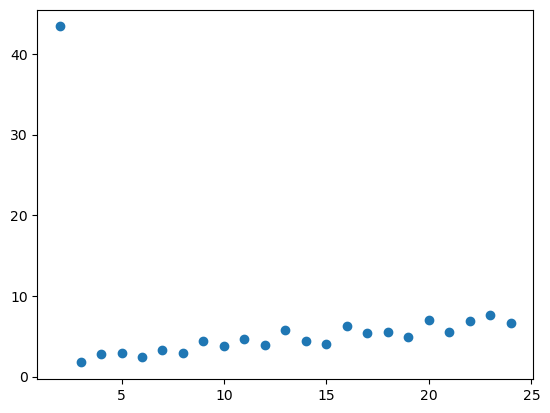

In [49]:
import numpy as np
import matplotlib.pyplot as plt


def lu_decomposition_with_beta(A):
    """
    Performs the LU decomposition with column pivoting and calculates beta values.

    Args:
        A (numpy.ndarray): A square matrix
    Returns:
        P (numpy.ndarray): Permutation matrix for column pivoting
        L (numpy.ndarray): Lower triangular matrix
        U (numpy.ndarray): Upper triangular matrix
        max_a_ij_k: Calculates the maximum entry in each step 
    """

    n = A.shape[0]
    P = np.eye(n)
    L = np.zeros_like(A)
    U = A.copy()
    max_a_ij_k = []

    for i in range(n):
        pivot = np.argmax(np.abs(U[i:, i])) + i
        
        # If pivot not equal to i, swap rows in U and permutation matrix
        if pivot != i:
            U[[i, pivot], :] = U[[pivot, i], :]  # Swap rows of U
            P[[i, pivot], :] = P[[pivot, i], :]  # Swap rows of P
            if i > 0:
                L[[i, pivot], :i] = L[[pivot, i], :i]
        
        # Calculate beta for the current step
        max_a_ij = np.max(np.abs(U))
        max_a_ij_k.append(max_a_ij)
        
        for j in range(i + 1, n):
            L[j, i] = U[j, i] / U[i, i]  # Multiplier
            U[j, i:] = U[j, i:] - L[j, i] * U[i, i:]  # Gaussian
    
    np.fill_diagonal(L, 1)

    return P, L, U, max_a_ij_k


n_vals = range(2,25)


num_matrices = 30


beta_vals = []

for n in n_vals:
    betas_for_n = []
    for _ in range(num_matrices):
        A = np.random.uniform(-1,1,(n,n))

        _, _, _, max_a_ij_k = lu_decomposition_with_beta(A)

        max_a_ij_k = np.max(max_a_ij_k)
        
        beta = max_a_ij_k / A.max()
        betas_for_n.append(beta)
    beta_vals.append((n,np.max(betas_for_n)))



n_values_plot, betas_plot = zip(*beta_vals)
print(betas_plot)
plt.scatter(n_values_plot,betas_plot)
plt.show()
